In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
import re
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import re
import string
import numpy as np 
import pandas as pd 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder

In [4]:
train_data = pd.read_csv('toxic_train.csv')
test_data= pd.read_csv('toxic_test.csv')

In [24]:
train_data.head()

,Unnamed: 0,comment_text,toxic
0,0,Explanation\r\nWhy the edits made under my use...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [25]:
test_data.head()

,Unnamed: 0,comment_text,toxic
0,5,Thank you for understanding. I think very high...,0
1,7,:Dear god this site is horrible.,0
2,11,"""::: Somebody will invariably try to add Relig...",0
3,13,""" \r\n\r\n It says it right there that it IS a...",0
4,14,""" \r\n\r\n == Before adding a new product to t...",0


In [26]:
train_data.isna().sum()

Unnamed: 0      0
comment_text    0
toxic           0
dtype: int64

In [27]:
test_data.isna().sum()

Unnamed: 0      0
comment_text    0
toxic           0
dtype: int64

In [28]:
def cleanTextAndTokenize(text):
        stop_words= stopwords.words('english')
        lem = WordNetLemmatizer()
        text = re.sub('[^A-Za-z]+', ' ', text).lower()
        text= "".join([i.lower() for i in text if i not in string.punctuation])
        tokens = word_tokenize(text)
        cleanText = ''
        for token in tokens:
            if(token not in stop_words):
                cleanText+=lem.lemmatize(token) + " "
        return cleanText

In [29]:
train_data['clean_text'] = train_data['comment_text'].apply(cleanTextAndTokenize)
test_data['clean_text'] = test_data['comment_text'].apply(cleanTextAndTokenize)

In [30]:
x_train = train_data['clean_text']
x_test = test_data['clean_text']

In [31]:
y_train = train_data['toxic']
y_test = test_data['toxic']

In [32]:
print(x_train.shape, x_test.shape)

(159571,) (63978,)


In [33]:
print(y_train.shape,y_test.shape)

(159571,) (63978,)


# 1D CNN using Keras Tokenizer

In [12]:
vocab_size = 1000
max_len =1000
batch_size = 32
embedding_dims =10
filters = 16
ker_size = 3 # kernel size
hidden_dims = 250
epochs = 10

In [36]:
import json
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [15]:
x_train = tokenizer.texts_to_matrix(x_train)
x_test = tokenizer.texts_to_matrix(x_test)

In [16]:
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen=max_len)

In [13]:
model = Sequential()
# First we add an embedding layer 
model.add(Embedding(vocab_size,embedding_dims,input_length=max_len)) 
# Adding a 1D convolutional Layer
model.add(Conv1D(filters, ker_size, padding='valid', activation='relu'))
# Max Pooling the Convolutions
model.add(MaxPooling1D())
# Again Computing the Convolutions
model.add(Flatten())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(x_train,y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
4987/4987 [==============================] - 165s 33ms/step - loss: 0.1799 - accuracy: 0.9417 - val_loss: 0.2025 - val_accuracy: 0.9244
Epoch 2/5
4987/4987 [==============================] - 134s 27ms/step - loss: 0.1503 - accuracy: 0.9505 - val_loss: 0.2024 - val_accuracy: 0.9250
Epoch 3/5
4987/4987 [==============================] - 139s 28ms/step - loss: 0.1375 - accuracy: 0.9533 - val_loss: 0.1950 - val_accuracy: 0.9296
Epoch 4/5
4987/4987 [==============================] - 140s 28ms/step - loss: 0.1239 - accuracy: 0.9568 - val_loss: 0.2133 - val_accuracy: 0.9259
Epoch 5/5
4987/4987 [==============================] - 147s 30ms/step - loss: 0.1045 - accuracy: 0.9630 - val_loss: 0.2327 - val_accuracy: 0.9253


No handles with labels found to put in legend.


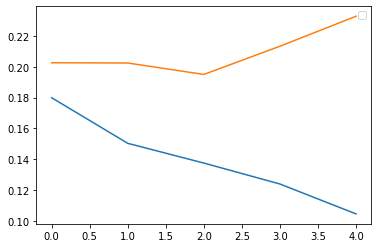

In [19]:
plt.plot(range(5),history.history['loss'])
plt.plot(range(5),history.history['val_loss'])
plt.legend()
plt.show()

In [19]:
# 95% accuracy on train data. 92.5% on test data

In [21]:
model.save('text_classification_model.h5')

In [ ]:
embeddings_index = {}
with open('glove.6B.50d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 50
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras import initializers
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=initializers.Constant(embedding_matrix),
    trainable=False,
)

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import Model
int_sequences_input = Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
# x = layers.Conv1D(128, 5, activation="relu")(x)
# x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(3, activation="softmax")(x)
model = Model(int_sequences_input, preds)
model.summary()

NameError: name 'embedding_layer' is not defined

In [ ]:
x_train = vectorizer(np.array([[s] for s in x_train])).numpy()
x_test = vectorizer(np.array([[s] for s in x_test])).numpy()

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]
)
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

In [22]:
history.history

NameError: name 'history' is not defined

In [16]:
train_data.head()

,Unnamed: 0,comment_text,toxic
0,0,Explanation\r\nWhy the edits made under my use...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\r\nMore\r\nI can't make any real suggestions...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 10)          10000     
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 16)           496       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 499, 16)           0         
_________________________________________________________________
flatten (Flatten)            (None, 7984)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               1996250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 2,006,997
Trainable params: 2,006,997
Non-trainable params: 0
____________________________________________